# Intervalos de confianza y tamaño del efecto

>Este tutorial es una adaptación al español del material [Statistical Thinking for the 21st Century](https://statsthinking21.github.io/statsthinking21-core-site/) desarrollado por Russell Poldrack. 

En el tutorial anterior discutimos cómo podemos usar los datos para probar hipótesis. Esos métodos proporcionaron una respuesta binaria: o rechazamos o no rechazamos la hipótesis nula. Sin embargo, este tipo de decisión pasa por alto un par de cuestiones importantes: 

- Nos gustaría saber **cuánta incertidumbre tenemos sobre la respuesta** (independientemente de la dirección que tome). Además, a veces no tenemos una hipótesis nula clara, por lo que nos gustaría ver qué rango de estimaciones son consistentes con los datos. 
- Nos gustaría saber **qué tan grande es realmente el efecto**, ya que un efecto estadísticamente significativo no es necesariamente un efecto prácticamente importante.

## Intervalos de confianza

Hasta ahora nos hemos centrado en estimar una estadística de valor único. Por ejemplo, supongamos que queremos estimar el peso medio de los adultos en el conjunto de datos de NHANES, por lo que tomamos una muestra del conjunto de datos y estimamos la media. En esta muestra, el peso medio fue de 79,92 kilogramos. 

Nos referimos a esto como una **estimación puntual**, ya que nos proporciona un solo número para describir nuestra estimación del parámetro de población. Sin embargo, sabemos que existe cierta incertidumbre acerca de esta estimación, que se describe mediante el **error estándar**. 

El error estándar está determinado por dos componentes: la desviación estándar de la población (que es el numerador) y la raíz cuadrada del tamaño de la muestra (que está en el denominador), tal como se muestra a continuación:

$$ SEM=\frac{\hat\sigma}{\sqrt{n}} $$

La desviación estándar de la población es un parámetro generalmente desconocido pero fijo que no está bajo nuestro control, mientras que el tamaño de la muestra está bajo nuestro control. Por lo tanto, **podemos disminuir nuestra incertidumbre sobre la estimación aumentando el tamaño de nuestra muestra**, hasta el límite del tamaño total de la población, momento en el que no hay ninguna incertidumbre porque podemos calcular el parámetro de la población directamente a partir de los datos de toda la población.

A menudo nos gustaría tener una forma de describir más directamente nuestra incertidumbre sobre una estimación estadística, lo que podemos lograr utilizando un **intervalo de confianza**. La mayoría de la gente está familiarizada con los intervalos de confianza a través de la idea de un **"margen de error"** para las encuestas políticas. 

Estas encuestas generalmente intentan proporcionar una respuesta que sea precisa dentro de +/- 3 por ciento. Por ejemplo, cuando se estima que un candidato gana una elección por 9 puntos porcentuales con un margen de error de 3, el porcentaje por el cual ganará se estima en 6-12 puntos porcentuales. 

En estadística, nos referimos a este tipo de rango de valores como un intervalo de confianza, que proporciona un **rango de valores para nuestra estimación de parámetros que son consistentes con nuestros datos de muestra, en lugar de solo darnos una estimación única basada en los datos**. Cuanto más amplio sea el intervalo de confianza, más inseguros somos acerca de nuestra estimación de parámetros.

Los intervalos de confianza son notoriamente confusos, principalmente porque no significan lo que podríamos pensar intuitivamente que significan. Si le digo que he calculado un "intervalo de confianza del 95%" para mi estadística, entonces **parecería natural pensar que podemos tener un 95% de confianza en que el valor verdadero del parámetro cae dentro de este intervalo**. 

Sin embargo, como veremos a lo largo del curso, los conceptos de estadística a menudo no significan lo que pensamos que deberían significar. En el caso de los intervalos de confianza, **no podemos interpretarlos de esta manera porque el parámetro de población tiene un valor fijo; está o no está en el intervalo, por lo que no tiene sentido hablar de la probabilidad de que eso ocurra**. 

Jerzy Neyman, el inventor del intervalo de confianza, dijo:
>“The parameter is an unknown constant and no probability statement concerning its value may be made” (Neyman 1937).

En cambio, tenemos que ver el procedimiento de intervalo de confianza desde el mismo punto de vista que vimos la prueba de hipótesis: como un procedimiento que a largo plazo nos permitirá hacer declaraciones correctas con una probabilidad particular. 

Por lo tanto, **la interpretación adecuada del intervalo de confianza del 95% es que es un intervalo que contendrá la media real de la población el 95% del tiempo**, y de hecho podemos confirmarlo usando simulaciones. 

El intervalo de confianza para la media se calcula como:

$$ CI = estimación \ puntual \pm  valor \ crítico * error \ estándar $$

donde el valor crítico está determinado por la distribución muestral de la estimación. La pregunta importante, entonces, es cómo obtenemos nuestra estimación para esa distribución muestral.

### Intervalos de confianza utilizando la distribución normal

Si conocemos la desviación estándar de la población, entonces podemos usar la distribución normal para calcular un intervalo de confianza. Por lo general, no la conocemos, pero para nuestro ejemplo del conjunto de datos de NHANES lo hacemos, ya que tratamos el conjunto de datos completo como la población (es 31,38 para el peso).

Supongamos que queremos calcular un intervalo de confianza del 95% para la media. El valor crítico serían entonces los valores de la distribución normal estándar que capturan el 95% de la distribución; estos son simplemente el percentil 2.5 y el percentil 97.5 de la distribución, que podemos calcular usando nuestro software estadístico, y resultan en $\pm 1.96$.

Por tanto, el intervalo de confianza para la media ($\bar{X}$) es:

$$ CI = \bar{X} \pm 1.96 * SE $$

Utilizando la media estimada de nuestra muestra (66.62) y la desviación estándar de la población conocida, podemos calcular el intervalo de confianza de [62.72, 70.50]. 

Ahora, procedamos a implementar este cálculo:

In [1]:
# Cargamos los datos
from nhanes.load import load_NHANES_data
import numpy as np

nhanes_data = load_NHANES_data()
nhanes_data = nhanes_data.dropna(subset=["WeightKg"])

# Generamos una muestra
sample_size = 250
sample = nhanes_data.sample(sample_size, random_state=100)["WeightKg"]

# Definimos nuestras variables para el cálculo del CI
sigma = nhanes_data["WeightKg"].std()
sem = sigma / np.sqrt(sample_size)
x_bar = sample.mean()

# Calculamos el CI al 95% utilizando la distribución normal
ci_low = x_bar - 1.96 * sem
ci_up = x_bar + 1.96 * sem

print("CI:", [ci_low, ci_up])

CI: [62.72564796060149, 70.50475203939851]


Alternativamente, podemos utilizar el paquete `scipy.stats`:

In [2]:
from scipy import stats

print(stats.norm.interval(alpha=0.95, loc=x_bar, scale=sem))

(62.72571943203296, 70.50468056796704)


### Intervalos de confianza utilizando la distribución t

Como se indicó anteriormente, si conociéramos la desviación estándar de la población, podríamos usar la distribución normal para calcular nuestros intervalos de confianza. Sin embargo, en general no lo hacemos, en cuyo caso la distribución t es más apropiada como distribución muestral. 

Recuerda que la distribución t es ligeramente más amplia que la distribución normal, especialmente para muestras más pequeñas, lo que significa que **los intervalos de confianza serán ligeramente más amplios de lo que serían si estuviéramos usando la distribución normal**. Esto incorpora la incertidumbre adicional que surge cuando estimamos parámetros basados en muestras pequeñas.

Podemos calcular el intervalo de confianza del 95% de una manera similar al ejemplo de distribución normal anterior, pero el valor crítico está determinado por el percentil 2.5 y el percentil 97.5 de la distribución t con los grados de libertad apropiados. 

Por tanto, el intervalo de confianza para la media ($\bar{X}$) es:

$$ CI = \bar{X} \pm t_{crit} * SE $$

donde $t_{crit}$ es el valor crítico t. Para el ejemplo de NHANES (con un tamaño de muestra de 250), el intervalo de confianza sería 66.62 $\pm$ 1.97 * 1.91: [62.85 - 70.38].

Recuerde que esto no nos dice nada sobre la probabilidad de que el valor real de la población caiga dentro de este intervalo, ya que es un parámetro fijo. En cambio, nos dice que, a largo plazo, **si calculamos el intervalo de confianza mediante este procedimiento, el 95% de las veces ese intervalo de confianza capturará el parámetro de población real**.

A continuación su implementación:

In [3]:
stats.t.interval(
    alpha=0.95, loc=sample.mean(), scale=stats.sem(sample), df=sample_size - 1
)

(62.85201526084143, 70.37838473915858)

### Relación de los intervalos de confianza con las pruebas de hipótesis

Existe una estrecha relación entre los intervalos de confianza y las pruebas de hipótesis. En particular, si el intervalo de confianza no incluye la hipótesis nula, entonces la prueba estadística asociada sería estadísticamente significativa. 

Por ejemplo, si está probando si la media de una muestra es mayor que cero con α = 0.05, simplemente puede verificar si cero está contenido dentro del intervalo de confianza del 95% para la media.

Las cosas se complican si queremos comparar las medias de dos condiciones (Schenker y Gentleman 2001). Hay un par de situaciones que están claras: 
- **Si cada media está contenida dentro del intervalo de confianza para la otra media, entonces definitivamente no hay diferencia significativa** en el nivel de confianza elegido. 
- **Si no hay superposición entre los intervalos de confianza, entonces hay una diferencia significativa** en el nivel elegido; de hecho, esta prueba es sustancialmente conservadora, de modo que la tasa de error real será menor que el nivel elegido. 

Pero, ¿qué pasa con el caso en el que los intervalos de confianza se superponen entre sí pero no contienen las medias para el otro grupo? En este caso, la respuesta depende de la variabilidad relativa de las dos variables y no hay una respuesta general. Sin embargo, **en general, se debe evitar el uso de la "prueba del globo ocular" para superponer intervalos de confianza**.

Podemos ilustrar la relación entre los intervalos de confianza y las pruebas de hipótesis mediante el siguiente ejemplo:

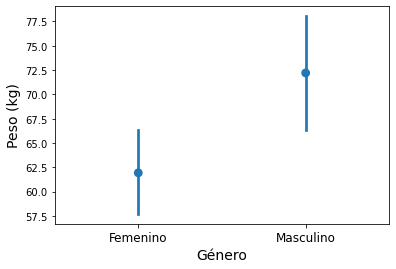

In [4]:
# Generamos una muestra
sample_size = 250
sample = (
    nhanes_data.sample(sample_size, random_state=100)
    .dropna(subset=["WeightKg"])
    .rename(columns={"WeightKg": "Weight"})
)

# Graficamos el CI al 95%
import seaborn as sns
import matplotlib.pyplot as plt

sns.pointplot(x="Gender", y="Weight", data=sample, ci=95, join=False)
plt.ylabel("Peso (kg)", size=14)
plt.xlabel("Género", size=14)
plt.xticks([0, 1], ["Femenino", "Masculino"], size=12);

Según el gráfico y los criterios previamente explicados, definitivamente hay diferencia significativa. Vamos a comprobarlo aplicando una prueba de hipótesis:

In [5]:
# Hacemos una comparacion de medias
grupo1 = sample.query('Gender == "Female"')["Weight"]
grupo2 = sample.query('Gender == "Male"')["Weight"]
stats.ttest_ind(grupo1, grupo2, equal_var=False)

Ttest_indResult(statistic=-2.66641868201817, pvalue=0.008238488926641339)

## Tamaño del efecto
>“Statistical significance is the least interesting thing about the results. You should describe the results in terms of measures of magnitude – not just, does a treatment affect people, but how much does it affect them.” Gene Glass, quoted in (Sullivan and Feinn 2012)

El tamaño del efecto es una medida estandarizada que compara el tamaño de algún efecto estadístico con una cantidad de referencia, como la variabilidad del estadístico. En algunos campos de la ciencia y la ingeniería, esta idea se denomina "ratio señal ruido". Hay muchas formas diferentes de cuantificar el tamaño del efecto, que dependen de la naturaleza de los datos.

### D de Cohen

Una de las medidas más comunes del tamaño del efecto se conoce como d de Cohen, que lleva el nombre del estadístico Jacob Cohen (quien es más famoso por su artículo de 1994 titulado "The Earth is Round (p <.05)"). Se utiliza para cuantificar la diferencia entre dos medias, en términos de su desviación estándar:

$$ d = \frac{ \bar{X}_{1} - \bar{X}_{2} } {s}  $$

donde $\bar{X}_{1}$ y $\bar{X}_{2}$ son las medias de ambos grupos, y $s$ es la desviación estándar agrupada (que es una combinación de las desviaciones estándar de las dos muestras, ponderadas por sus tamaños de muestra):

$$ s = \sqrt{ \frac{\left ( n_{1} - 1 \right )^{2} s^{2}_{1} + \left ( n_{2} - 1 \right )^{2} s^{2}_{2}}{n_{1} + n_{2} - 2 }}  $$

donde $n_{1}$ y $n_{2}$ son los tamaños de muestra y $s^{2}_{1}$ y $s^{2}_{2}$ son las desviaciones estándar de cada grupo.

 Ten en cuenta que esto es muy similar en espíritu al estadístico t. La principal diferencia es que **el denominador en el estadístico t se basa en el error estándar de la media, mientras que el denominador en la D de Cohen se basa en la desviación estándar de los datos**. Esto significa que, si bien el estadístico t aumentará a medida que el tamaño de la muestra aumenta, el valor de la D de Cohen seguirá siendo el mismo.

Existe una escala de uso común para interpretar el tamaño de un efecto en términos de la d de Cohen, que se muestra en la siguiente tabla: 

| D de Cohen 	| Interpretación 	|
|------------	|----------------	|
| 0 - 0.2    	| Despreciable   	|
| 0.2 - 0.5  	| Pequeño        	|
| 0.5 - 0.8  	| Mediano        	|
| 0.8 +      	| Grande         	|

Puede ser útil observar algunos efectos comúnmente entendidos para ayudar a comprender estas interpretaciones. Por ejemplo, el tamaño del efecto para las diferencias de género en la altura de los adultos (d = 2.05) es muy grande en referencia a nuestra tabla anterior.

También podemos ver esto al observar las distribuciones de las alturas de hombres y mujeres en una muestra del conjunto de datos de NHANES:

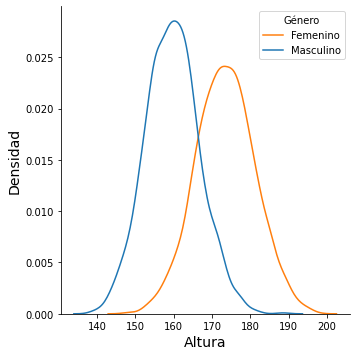

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cargamos los datos
nhanes_data = load_NHANES_data()
adult_nhanes_data = nhanes_data.query("AgeInYearsAtScreening > 17")
adult_nhanes_data = adult_nhanes_data.dropna(
    subset=["StandingHeightCm"]
).rename(columns={"StandingHeightCm": "Height"})

# Generamos un gráfico para visualizar las distribuciones
sns.displot(
    data=adult_nhanes_data, x="Height", hue="Gender", kind="kde", legend=False
)
plt.xlabel("Altura", size=14)
plt.ylabel("Densidad", size=14)
plt.legend(["Femenino", "Masculino"], title="Género");

 La muestra que las dos distribuciones están bastante bien separadas, aunque aún se superponen, destacando el hecho de que **incluso cuando hay un tamaño de efecto muy grande para la diferencia entre dos grupos, habrá individuos de cada grupo que se parecerán más al otro grupo**. Calculemos ahora la D de Cohen:

In [7]:
# Grupos a comparar
c0 = adult_nhanes_data.query('Gender == "Male"')["Height"]
c1 = adult_nhanes_data.query('Gender == "Female"')["Height"]

# Calculo de la D de Cohen
s = np.sqrt(
    ((len(c0) - 1) * np.std(c0) ** 2 + (len(c1) - 1) * np.std(c1) ** 2)
    / (len(c0) + len(c1) - 2)
)
d = (np.mean(c0) - np.mean(c1)) / s
print("D de Cohen:", d)

D de Cohen: 1.8747184100915801


Alternativamente, podemos utilizar el paquete `pingouin`:

In [10]:
!pip install pingouin

In [9]:
import pingouin as pg

pg.ttest(c0, c1)

/home/renato/.virtualenvs/stats/lib/python3.7/site-packages/pingouin/bayesian.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,68.903377,5313.298232,two-sided,0.0,"[13.38, 14.16]",1.874373,inf,1.0


Vale la pena señalar que rara vez encontramos efectos de esta magnitud en la ciencia, en parte porque son efectos tan obvios que no necesitamos investigación científica para encontrarlos. Los efectos muy grandes reportados en la investigación científica a menudo reflejan el uso de prácticas de investigación cuestionables en lugar de efectos verdaderamente enormes en la naturaleza. 

También vale la pena señalar que incluso para un efecto tan grande, las dos distribuciones aún se superponen: habrá algunas mujeres que serán más altas que el hombre promedio, y viceversa. **Para los efectos científicos más interesantes, el grado de superposición será mucho mayor, por lo que no deberíamos sacar conclusiones sólidas de inmediato sobre individuos de diferentes poblaciones basadas incluso en un tamaño de efecto grande**.

## Teoría clásica de los tests

Al momento de trabajar con datos cuantitativos provenientes de escalas psicométricas nos encontramos también con errores en la medición, los cuales dependen no solo de las características propias del muestreo, sino también de las propiedades de la pruebas. 

Para ello, examinemos la teoría clásica de los tests. Esta plantea que, al aplicar una escala, **la puntuación observada del sujeto está compuesta de forma aditiva por un nivel de rendimiento real y un error aleatorio**. Este planteamiento se expresa a través de la siguiente ecuación:

$$ X_{ij} = T_{ij} + E_{ij} $$

donde $X_{ij}$ es el puntaje observado, $T_{ij}$ es el puntaje real del sujeto y $E_{ij}$ es el error aleatorio, para cada sujeto $i$ y para cada prueba $j$. Este planteamiento teórico está a la base de la mayoría de las pruebas psicológicas.

### Error estándar de medición

Al momento de registrar el puntaje de un individuo con una prueba podemos definir un intervalo en el cual confiamos que se encontrará la puntuación real del individuo la mayoría de las veces. Para ello, necesitamos calcular el **error estándar de medición**, el cual se define como **la variación esperada de la puntuación observada de un sujeto individual alrededor de la puntuación real**, y se expresa a través de la siguiente ecuación:

$$ \sigma_{E} = \sigma_{X}\sqrt{(1-\rho)} $$

donde $\sigma_{E}$ es el error estándar de medición, $\sigma_{X}$ es la varianza del puntaje observado y $\rho$ el coeficiente de confiabilidad del instrumento.  

De este modo, utilizando la distribución normal, el intervalo de confianza al 95% para la puntuación real en torno a la puntuación observada $X$ se calcula como: 

$$ CI = X \pm 1.96 * \sigma_{E} $$